# Exploring Bangladesh 🌏

Located in South Asia, bordered by India to the north, east, and west, and Myanmar to the southeast and has a total area of 147,570 square kilometers, the eighth most populous country in the world and a population of around 170 million.

### Objectives:
1. Performing an EDA to find out the Ecological Zones found in the country.
2. Carrying out the exploration further to know about the Climate Zones, Soil Cover, Holdridge Zones, and Agro-ecological Zones find in the region.
3. Analysis of **Sundarban Freshwater Swamp Forests and Sundarban Mangroves** found in the country.
4. Using WorldClim's historical climate dataset to find the Annual Mean Temperature & Annual Mean Precipitation in the country.
5. Observing the outputs to understand the correlation between the analyzed subjects wrt temperature and precipitation, including Water Scarcity and Soil Nutrients Availability.

## About:

Bangladesh has a diverse range of ecosystems, including tropical forests and wetlands.

- One of the most important ecosystems in Bangladesh is the Sundarbans mangrove forest, which is home to a range of endangered species. The forest also provides important ecosystem services, such as carbon sequestration and storm protection for coastal communities.

- The freshwater swamp forests in Bangladesh are important ecosystems that provide a range of ecological and economic benefits. These forests are found in the low-lying areas of the country, particularly in the northeastern region, and are characterized by their unique vegetation and waterlogged soils.

In [2]:
import geojson
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import requests, io
from IPython.display import display, Markdown


%matplotlib inline
import os

In [3]:
import rasterio as rst
from rasterio.plot import show
from rasterio.mask import mask

In [4]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [5]:
def getdf(input):
  file = input
  return gpd.read_file(file)

## Datasets:

- *bangladesh_gez*: Bangladesh's Global Ecological Zones
- *terrestrial_ecoregion*: Dataset depicting the terrestrial ecoregions of the world (Sundarbans Freshwater Swamp and Sundarbans Mangroves were selected for this analysis).
- *climate*: Climate zone map to help determine the climatic conditions of the region.
- *soil*: World soil resources dataset to determine the types of soil covers of a particular region/forest.
- *holdridge_zones*: Dataset for global holdridge zones to understand the classification of land areas based on the bioclimatic conditions.
- *agroecological_zones*: To help better understand and visualize the zones defined on the basis of landform, soil & climatic conditions of a particular region.
----------
- *avg_ppt_tif*: Tag Image File to visualize the average precipitation across the world.
- *avg_temp_tif*: Tag Image File to visualize the average temperature across the world.
- *ws_tif*: Tag Image File to visualize the regions with water scarcity across the world.
- *soiln_tif*: Tag Image File to visualize the availability of soil nutrients across the world.


## Findings:

- **Ecological Zones:** 
    - 1. Tropical Moist Forest
    - 2. Tropical Rainforest

- **(Major) Terrestial Ecoregions:**
    - 1. Lower Gangetic Plains Moist Decidious Forest 
    - 2. Sundarban Freshwater Swamp Forest 
    - 3. Sundarbans Mangroves 
    - 4. Mizoram-Manipur-Kanchin Rain Forests 
    - 5. Brahmaputra Valley Semi-Evergreen Forests.
---

- **Climate Zone:**
    - The Tropical Rainforest of Bangladesh has got Tropical Wet climate, and the other zone, i.e. The Tropical Moist forest has got a mix of both Tropical Moist in the western areas and Tropical Wet climate on the eastern areas of the zone.

- **Soil Cover:**
    - The soil cover in the area of Tropical Moist Forest mainly consists of **Gleysol - found in areas with high levels of flooding, such as low-lying areas along rivers and in coastal regions. These soils are often used for rice cultivation due to their high fertility and ability to retain water. However, they are also prone to soil erosion and nutrient leaching, which can impact crop productivity.**
    - In the areas of Tropical Rainforest a combination of Acrisol (in Subtropical Rainforest), Gleysol, Fluvisol (in southern region with Tropical Moist Forests around Sundarban Mangroves) and Leptosol (in Kanchin Rainforests) can be found.

    - ***Fluvisol: Formed by sedimentation and deposition of riverine materials, which makes them highly fertile. In Bangladesh, Fluvisols are found along the major rivers, such as the Brahmaputra, Ganges, and Meghna. Due to their high fertility and good drainage, Fluvisols are suitable for intensive rice cultivation, which is the major crop in Bangladesh.***
    - ***Leptosol: Found in the hilly regions of the country, particularly in the Chittagong Hill Tracts area. The soil is typically found on steep slopes and ridges, and is often associated with forested areas.***

- **Holdridge Zones:**
    - Subtropical Moist Forests can be found in the central region of Bangladesh, the Tropical Dry Forests can be found on the western coast. The Northern and the a part of Southern region along the eastern coast contains Tropical Moist Forests.

- **AgroEcological Zones:**
    - Here, AgroEcological zone in most part of Bangladesh and Moist Decidious Forest contains Irrigated Soils, followed by Hydomorphic Soil (formed under conditions of excess moisture or waterlogging) in Sundarbans Freshwater Swamp Forests; however the Sundarbans Mangroves are found to be having Humid, Poor Soils on the southernmost coast.

In [6]:
bangladesh = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\BGD_AL2_Bangladesh.json'
bangladesh = getdf(bangladesh)

In [7]:
bangladesh_gez = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\BGD_AL2_Bangladesh_GEZ.json'
bangladesh_gez = getdf(bangladesh_gez)

In [8]:
terrestrial_ecoregion = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\TerrestrialEcoregionsoftheWorld_WWF.geojson'
terrestrial_ecoregion = getdf(terrestrial_ecoregion)

In [134]:
climate = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\IPCC_ClimateZoneMap_Vector.geojson'
climate = getdf(climate)

In [15]:
soil = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\World_Soil_Resources_wgs84.geojson'
soil = getdf(soil)

In [16]:
holdridge_zones = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\HoldridgeLifeZones.json'
holdridge_zones = getdf(holdridge_zones)

In [242]:
agroecological_zones = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\GlobalAgroEcologicalZones_GAEZ.geojson'
agroecological_zones = getdf(agroecological_zones)

In [18]:
print(bangladesh_gez["gez"])

0    Tropical moist forest
1      Tropical rainforest
Name: gez_name, dtype: object


### #1: Ecological Zones

1. Tropical Moist Forest
2. Tropical Rainforest

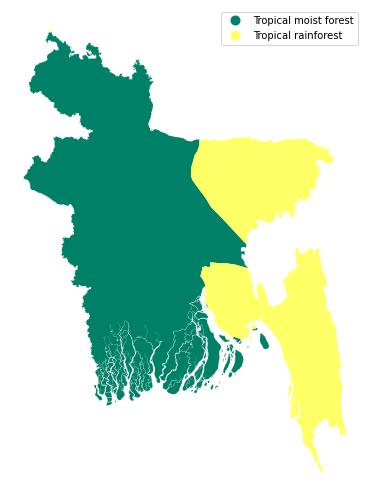

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9));
bangladesh_gez.plot(ax=ax, column='gez', cmap = 'summer', legend=True)

plt.axis('off')
plt.show()

<dl>
<dt>Tropical Moist Forest:</dt>
<dd>The forests are characterized by a high diversity of tree species, and the canopy height varies from 15 to 30 meters. The climate is subtropical, with high humidity and rainfall throughout the year. The major tree species in this forest include Dipterocarpus, Artocarpus, Toona, and Terminalia.</dd> </dl>
<dl>
<dt>Tropical Rainforest:</dt>
<dd> The forest is characterized by high humidity, a hot climate, and high rainfall, with an annual average of 1,500-2,000 mm. The dominant tree species in this forest include Heritiera fomes, Excoecaria agallocha, and Sonneratia apetala. </dd>
</dl>

### #2: Terrestrial Ecoregions

In [27]:
terres_ecoregion_bangladesh = terrestrial_ecoregion.clip(bangladesh)

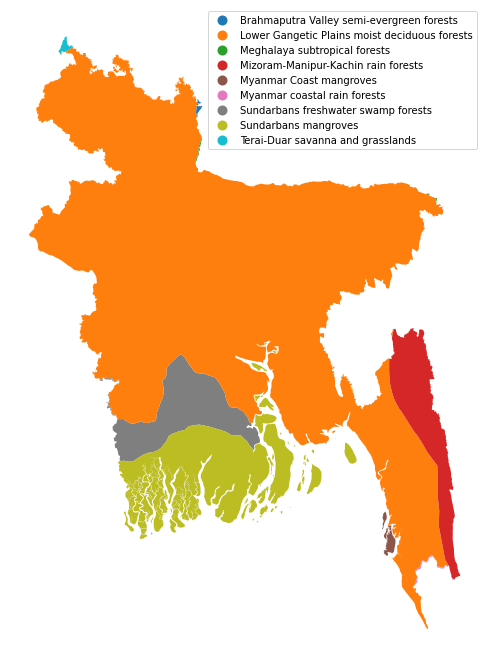

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
terres_ecoregion_bangladesh.plot(ax=ax, column='terrestrial_eco', legend=True)

plt.axis('off')
plt.show()

### #3: Climate Zones

In [234]:
classification = { '1': 'Warm Temperate Moist', '2': 'Warm Temperate Dry', '3': 'Cool Temperate Moist', '4': 'Cool Temperate Dry', 
'5': 'Polar Moist', '6': 'Polar Dry', '7': 'Boreal Moist', '8': 'Boreal Dry', '9': 'Tropical Montane', '10': 'Tropical wet',
 '11': 'Tropical Moist', '12': 'Tropical Dry'
}

# normalizing column name
climate.rename(columns={'class': 'cli_class'}, inplace=True)

# treating oceans
climate = climate[climate.class_name != '0']

# using defined class names and replacing them to the corresponding codes
climate.class_name = climate.class_name.astype('str').replace(classification)

climate.columns = climate.columns.str.lower()

In [235]:
climate_bangladesh = climate.clip(bangladesh)

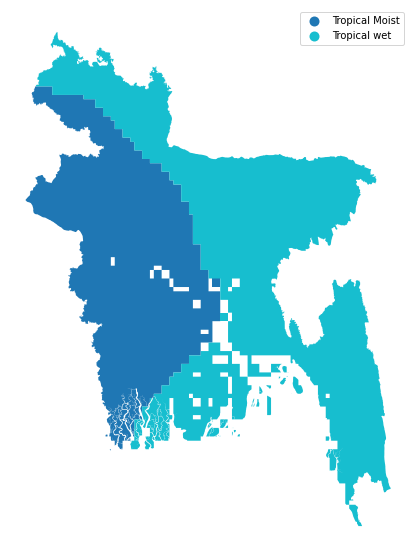

In [236]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
climate_bangladesh.plot(ax=ax, column='cli_code', legend=True)

plt.axis('off')
plt.show()

### #4: Soil Cover

In [35]:
# normalizing column name
soil.rename(columns={'soilcode_c': 'ipcc'}, inplace=True)

# clipping the nz region from soil_nz using the geometry from 'nz'
soil_bangladesh = soil.clip(bangladesh)

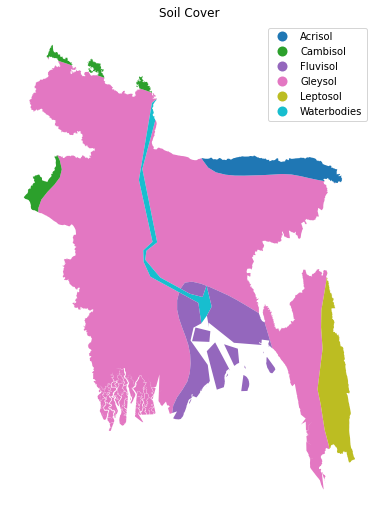

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9));
soil_bangladesh.plot(ax=ax, column='soil_c', legend=True)
ax.set_title("Soil Cover")
plt.axis('off')
plt.show()

### #5: Holdridge Zones

In [37]:
# clipping the nz region from holdridge_zones_nz using the geometry from 'nz'
holdridge_zones_ban = holdridge_zones.clip(bangladesh)

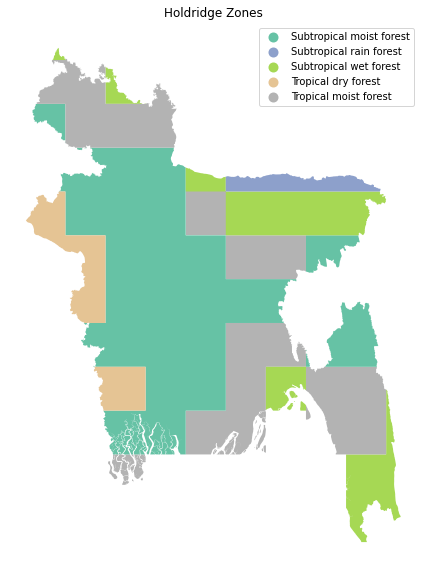

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
holdridge_zones_ban.plot(ax=ax, column='holdridge_c', legend=True, cmap='Set2')
ax.set_title("Holdridge Zones")
plt.axis('off')
plt.show()

### #6: AgroEcological Zones

In [245]:
values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}

# # normalizing column name
agroecological_zones.rename(columns={'agroec_code': 'agec_code'}, inplace=True)

# using defined values and replacing them to the corresponding codes
agroecological_zones.value = agroecological_zones.value.astype('str').replace(values)

In [246]:
agroecological_zones_ban = agroecological_zones.clip(bangladesh)

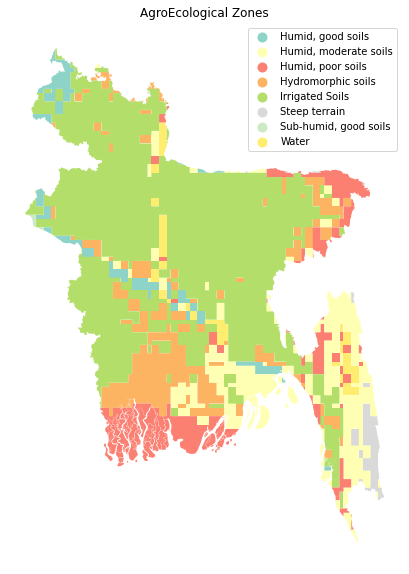

In [247]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
agroecological_zones_ban.plot(ax=ax, column='agec_code', legend=True, cmap='Set3')
ax.set_title("AgroEcological Zones")
plt.axis('off')
plt.show()

### Plotting Climate Zones, Soil Cover, Holdridge & Agro-Ecological Zones:

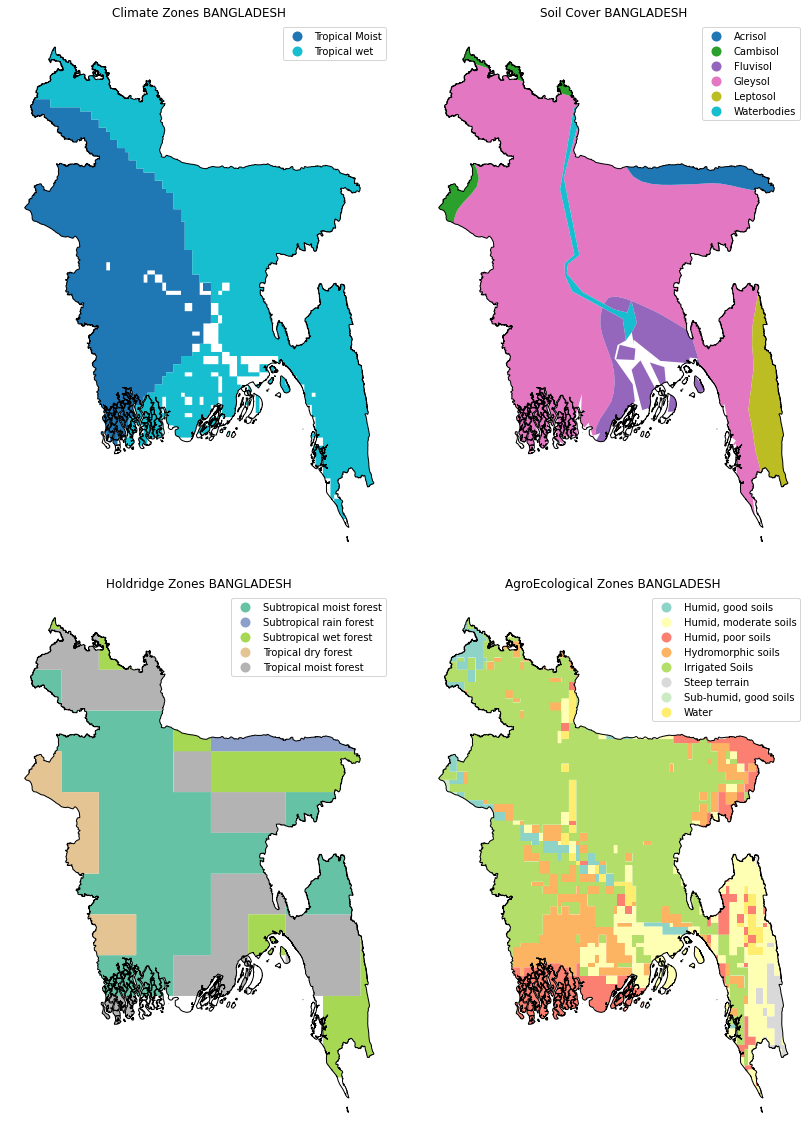

In [237]:
fig, ax = plt.subplots(2, 2, figsize=(12, 16))

climate_bangladesh.plot(ax=ax[0][0], column='class', legend=True)
soil_bangladesh.plot(ax=ax[0][1], column='soilcode_c', legend=True)
holdridge_zones_ban.plot(ax=ax[1][0], column='holdridge_c', cmap='Set2', legend=True)
agroecological_zones_ban.plot(ax=ax[1][1], column='agec_code', cmap='Set3', legend=True)

ax[0][0].set_title("Climate Zones BANGLADESH")
ax[0][1].set_title("Soil Cover BANGLADESH")
ax[1][0].set_title("Holdridge Zones BANGLADESH")
ax[1][1].set_title("AgroEcological Zones BANGLADESH")

for i in range(2):
    for j in range(2):
        bangladesh.plot(figsize=(12, 12), color='none', ax=ax[i][j])
        ax[i][j].axis('off')

plt.tight_layout()
plt.show()

## Analysis of Bangladesh's Freshwater Swamp Forest & Sundarbans Mangroves

In [29]:
forest_freshwater_swamp = terrestrial_ecoregion[terrestrial_ecoregion['ECO] == 'Sundarbans freshwater swamp forests']
forest_sundarbans_mangroves = terrestrial_ecoregion[terrestrial_ecoregion['ECO'] == 'Sundarbans mangroves']

In [22]:
forest_freshwater_swamp = forest_freshwater_swamp.clip(bangladesh)
forest_sundarbans_mangroves = forest_sundarbans_mangroves.clip(bangladesh)

In [23]:
forest_comb = pd.concat([forest_freshwater_swamp, forest_sundarbans_mangroves], axis=0)

In [123]:
area_km2 = forest_freshwater_swamp['area_km2'].unique()[0]
realm    = forest_freshwater_swamp['REALM_1'].unique()[0]
biome = forest_freshwater_swamp['BIOME'].unique()[0]
gbl_stat = forest_freshwater_swamp['GBL_STAT'].unique()[0]

In [124]:
print(f'Area: {area_km2} km2',
      f'Biogeographical Realm: {realm}',
      f'Biome: {biome} (Tropical & Subtropical Moist Broadleaf Forests)',
      f'Global Status: {gbl_stat} (Vulnerable)',
      sep='\n')

Area: 14525 km2
Biogeographical Realm: IndoMalay
Biome: 1 (Tropical & Subtropical Moist Broadleaf Forests)
Global Status: 1 (Vulnerable)


In [125]:
area_km2 = forest_sundarbans_mangroves['area_km2'].unique()[0]
realm    = forest_sundarbans_mangroves['REALM_1'].unique()[0]
biome = forest_sundarbans_mangroves['BIOME'].unique()[0]
gbl_stat = forest_sundarbans_mangroves['GBL_STAT'].unique()[0]

In [127]:
print(f'Area: {area_km2} km2',
      f'Biogeographical Realm: {realm}',
      f'Biome: {biome} (Mangroves)',
      f'Global Status: {gbl_stat} (Vulnerable)',
      sep='\n')

Area: 20383 km2
Biogeographical Realm: IndoMalay
Biome: 14 (Mangroves)
Global Status: 1 (Vulnerable)


### Freshwater Swamp Forest & Sundarbans Mangroves

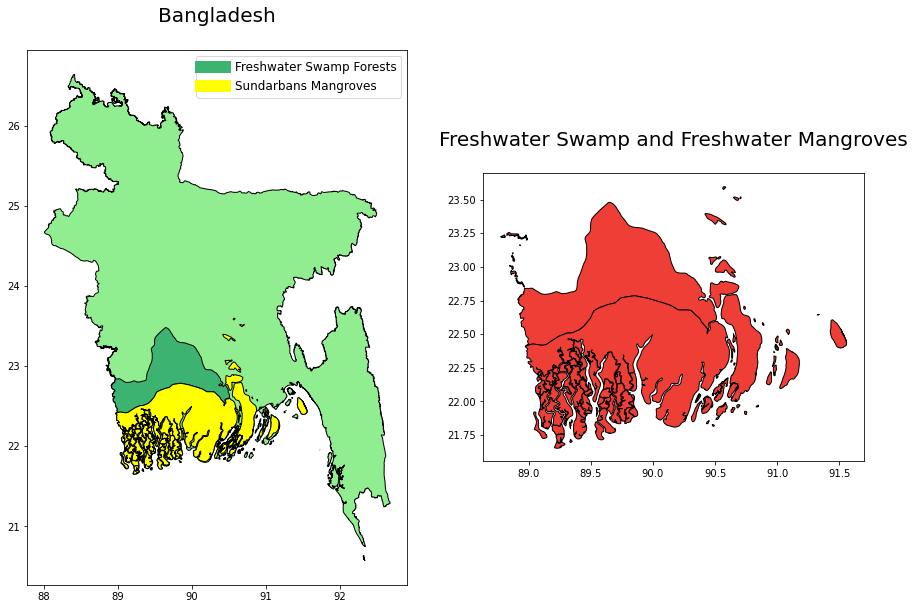

In [259]:
from matplotlib.lines import Line2D

# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(15,15))

# first map axes[0]
axes[0].set_title('Bangladesh\n', fontsize=20)
bangladesh.plot(ax=axes[0], color='lightgreen', edgecolor='black')
forest_freshwater_swamp.plot(ax=axes[0], color="mediumseagreen", edgecolor="black")
forest_sundarbans_mangroves.plot(ax=axes[0], color="yellow", edgecolor="black")
legend_elements = [Line2D([0], [0], color='mediumseagreen', lw=12, label='Freshwater Swamp Forests'),
                   Line2D([0], [0], color='yellow', lw=12, label='Sundarbans Mangroves')]
axes[0].legend(handles=legend_elements, fontsize=12)

# third map axes[1]
axes[1].set_title('Freshwater Swamp and Freshwater Mangroves\n', fontsize=20)
forest_concat.plot(ax=axes[1], color='#EF3E36', edgecolor='black')

plt.show()

In [250]:
soil_forest = soil.clip(forest_concat)

In [251]:
climate_forest = climate.clip(forest_concat)

In [47]:
holdridge_zones_forest = holdridge_zones.clip(forest_concat)

In [48]:
agroecological_zones_forest = agroecological_zones.clip(forest_concat)

### Plotting the selected area's Climate Zones, Soil Cover, Holdridge & Agro-Ecological Zones:

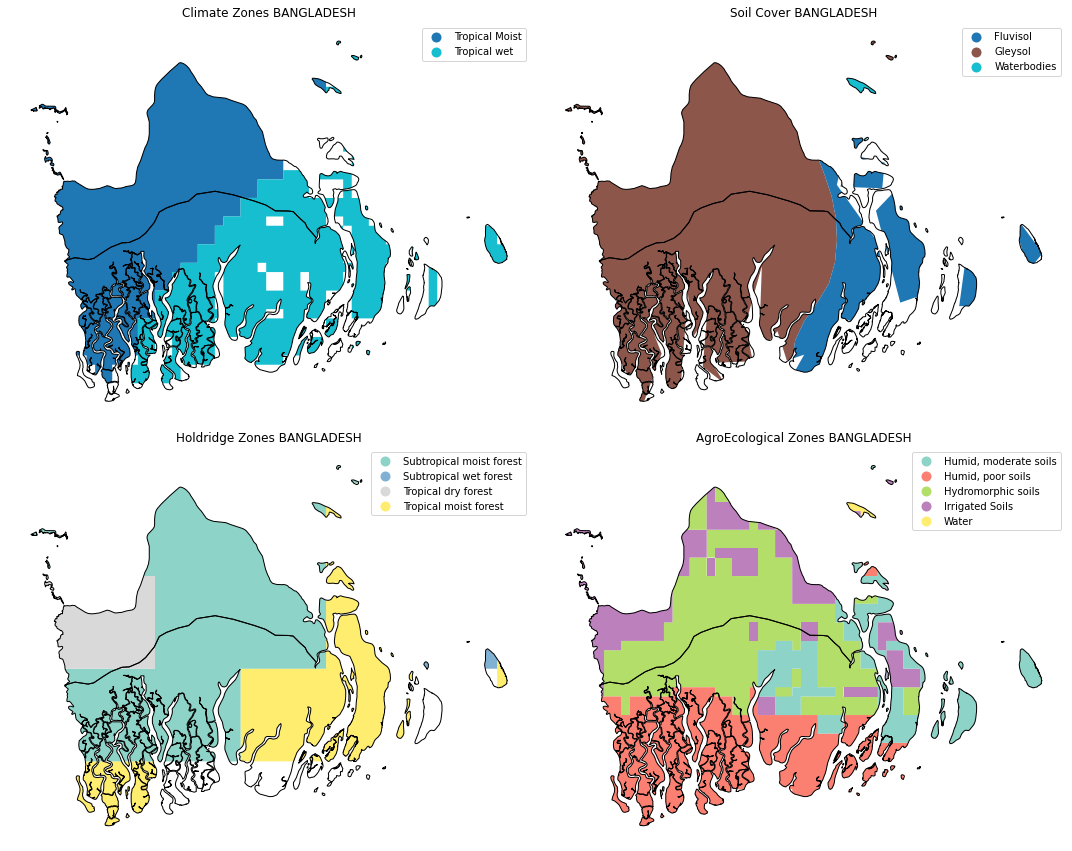

In [252]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

climate_forest.plot(ax=ax[0][0], column='class_cli_forest', legend=True)
soil_forest.plot(ax=ax[0][1], column='soil_c_forest', legend=True)
holdridge_zones_forest.plot(ax=ax[1][0], column='holdridge_c_forest', cmap='Set3', legend=True)
agroecological_zones_forest.plot(ax=ax[1][1], column='ageco_forest', cmap='Set3', legend=True)

ax[0][0].set_title("Climate Zones BANGLADESH")
ax[0][1].set_title("Soil Cover BANGLADESH")
ax[1][0].set_title("Holdridge Zones BANGLADESH")
ax[1][1].set_title("AgroEcological Zones BANGLADESH")

for i in range(2):
    for j in range(2):
        forest_df.plot(figsize=(12, 12), color='none', ax=ax[i][j])
        ax[i][j].axis('off')

plt.tight_layout()
plt.show()

### Findings:
- **Sundarbans Freshwater Swamp Forests:**
- Ecological Zone: Lies in Tropical Moist Forest.
- Climate Zone: The climate in Freshwater Swamp Forests is mostly Tropical Moist, however regions of Tropical Wet climate can be well found as we move to the easternmost part of the forest.
- Soil Cover: Gleysol soil (found in low-lying areas that are subject to flooding and waterlogging. These areas are typically located along the edges of rivers and creeks, and are characterized by fluctuating water levels and high salinity) is generally found in this region.
- Holdridge Zone: This forest is mainly the part of Subtropical Moist Forest, with a patch of Tropical Dry Forest on the western coast where the average temperature is relaitvely higher.
- AgroEcological Zone: Hydomorphic and Irrigated Soils are spotted in this forest.

---
- **Sundarban Mangroves**:

- Ecological Zone: Lies mainly in Tropical Moist Forest, with a small region of Tropical Rainforest on the easternmost regions.
- Climate Zone: The climate in Sundarban Mangroves is Tropical Wet as this region receives relatively higher precipitation as compared to the Freshwater Swamp Forests, although a patch of Tropical Moist could be found on the westernmost part.
- Soil Cover: The soil in this forest is mainly Gleysol, however a good proportion of Fluvisol could be found in the eastern region receiving high rainfall, which are highly fertile and suitable for intensive rice cultivation.
- Holdridge Zone: Tropical & Sub Tropical Moist.
- AgroEcological Zone: Humid, Poor Soil can be found on the southernmost coast, with patches of Hydomorphic and Humid, Moderate Soil in the northern and central region of the forest.

## #7: Climate Data [Bangladesh]

### 7.1: Climate Shifts (1901-2000)

<h1 style="text-align:center; font-weight:bold;">Bangladesh Climate Shift 1901-2000 </h1>

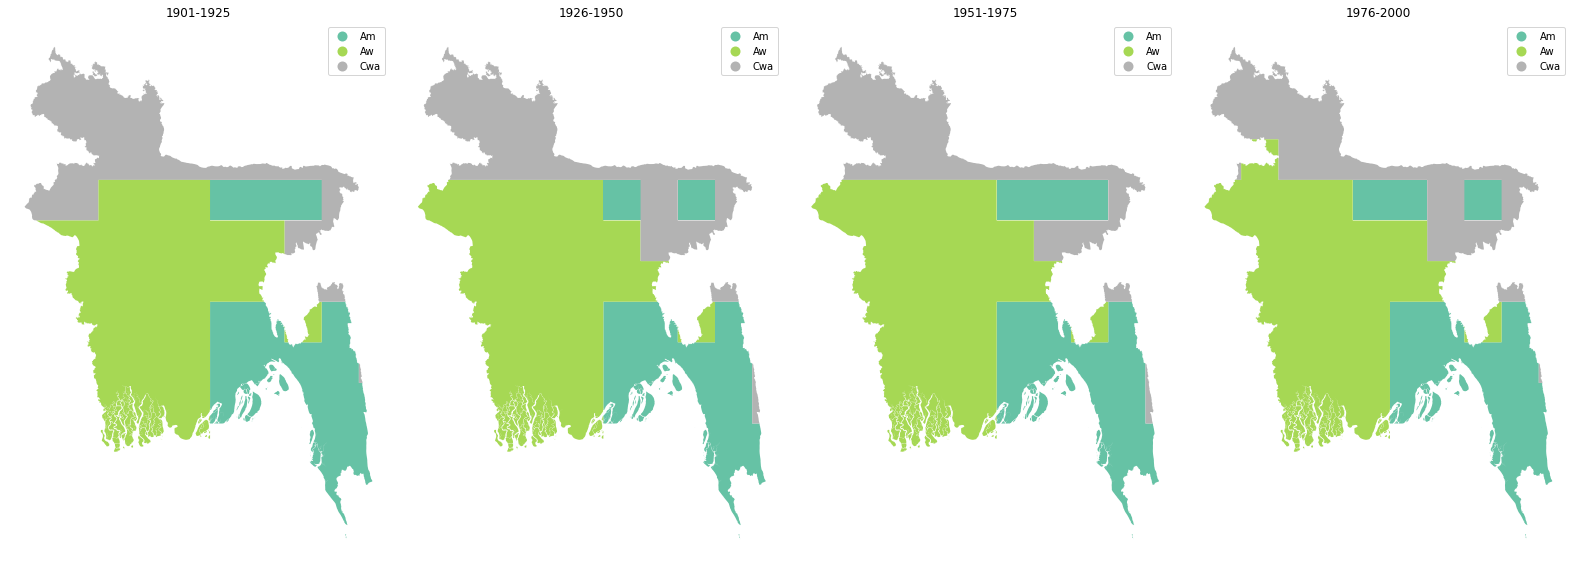

In [214]:
display(Markdown('<h1 style="text-align:center; font-weight:bold;">Bangladesh Climate Shift 1901-2000 </h1>'))
fig, axs = plt.subplots(1, 4, figsize=(22, 12))
replace = {
        11: 'Af', 12 :'Am', 13 : 'As', 14 : 'Aw', 21 : 'BWk', 22 : 'BWh', 26 : 'BSk', 27 : 'BSh',
        31 : 'Cfa', 32 : 'Cfb', 33 : 'Cfc', 34 : 'Csa', 35 : 'Csb', 36 : 'Csc', 37 : 'Cwa', 38 : 'Cwb', 
        39 : 'Cwc', 41 : 'Dfa', 42 : 'Dfb', 43 : 'Dfc', 44 : 'Dfd', 45 : 'Dsa', 46 : 'Dsb', 47 :'Dsc', 
        48 :'Dsd', 49 : 'Dwa', 50 : 'Dwb', 51 : 'Dwc', 52 : 'Dwd', 61 : 'EF', 62 :'ET',
    }

for i, year in r(["1901-1925", "1926-1950", "1951-1975", "1976-2000"]):
    filename = f"KoppenGeigerClimateShifts/{year}.geojson"
    koppen_shift = gpd.read_file(filename)
    koppen_shift['KOPPEN'] = koppen_shift['koppen'].map(replace)
    climate_shift_bd = gpd.clip(koppen_shift, bangladesh)
    climate_shift_bd.plot(ax=axs[i], column='gridcode', legend=True, cmap='Set2')
    axs[i].set_title(year, fontsize=12)
    axs[i].set_axis_off()
plt.tight_layout()
plt.show()

### Climate Shifts (2001-2100 A1FI, A2, B1 & B2 Scenarios)

<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [A1FI]</h1>

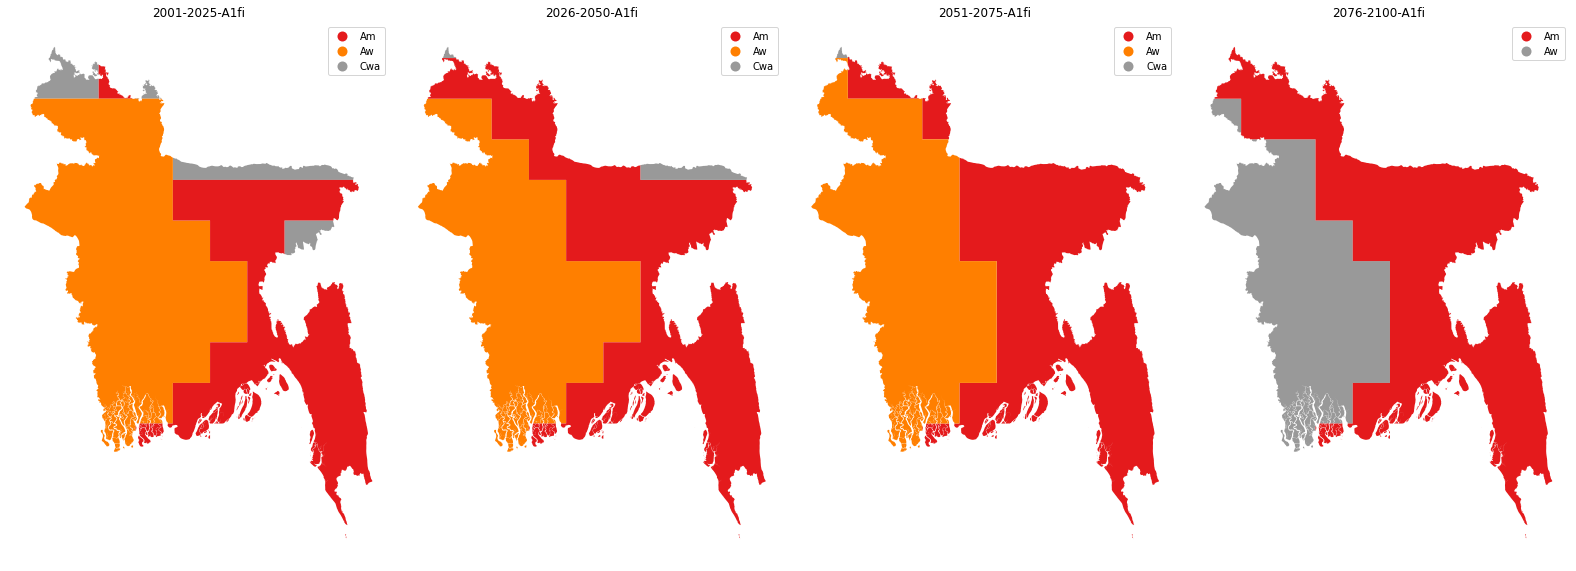

<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [A2]</h1>

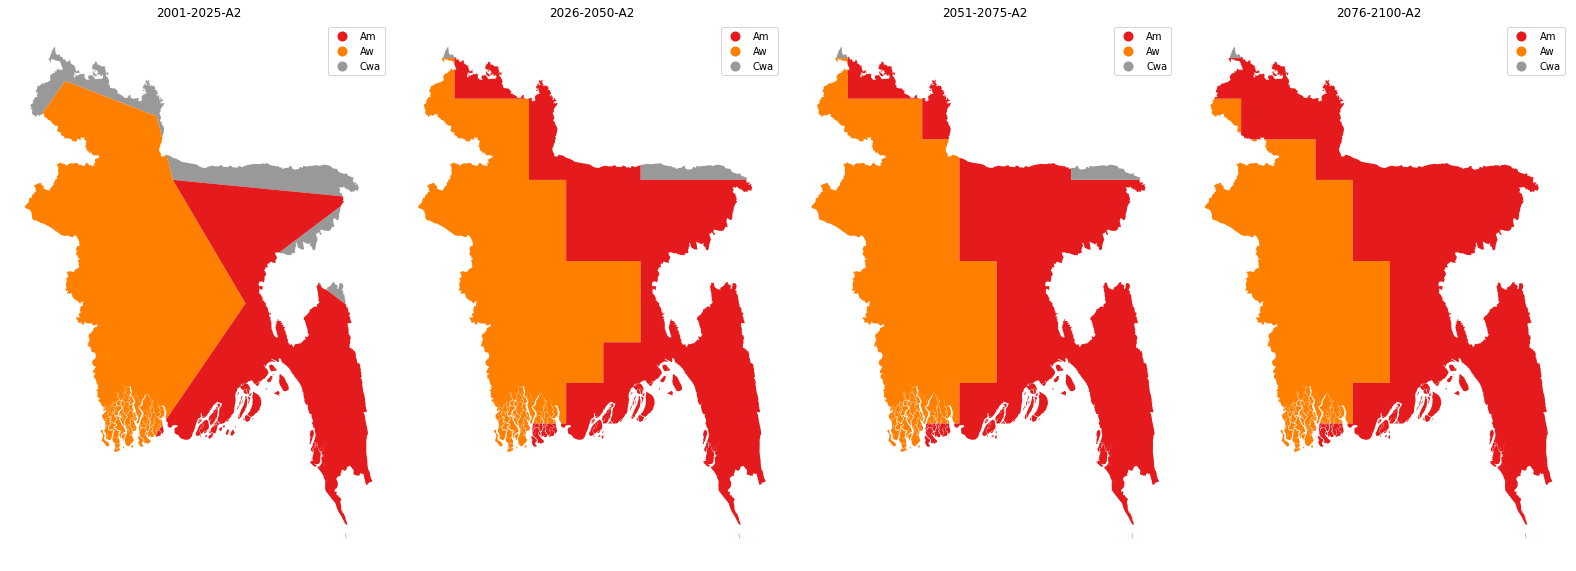

<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [B1]</h1>

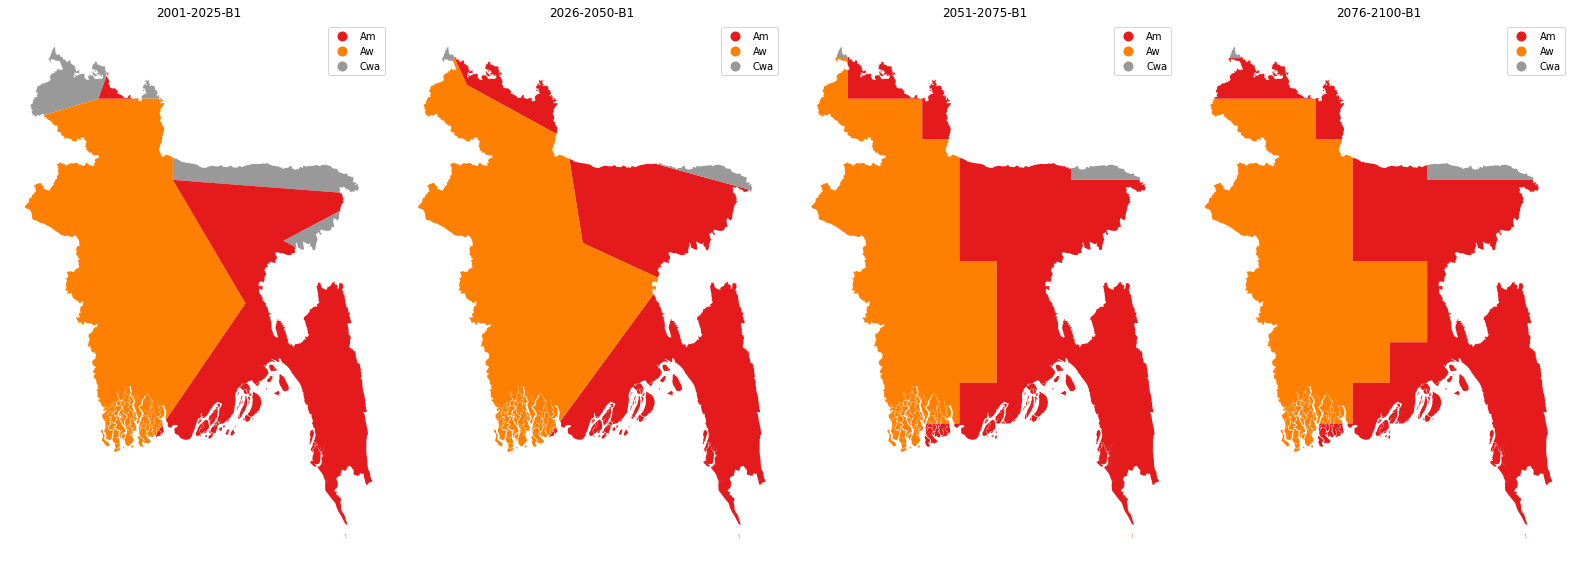

<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [B2]</h1>

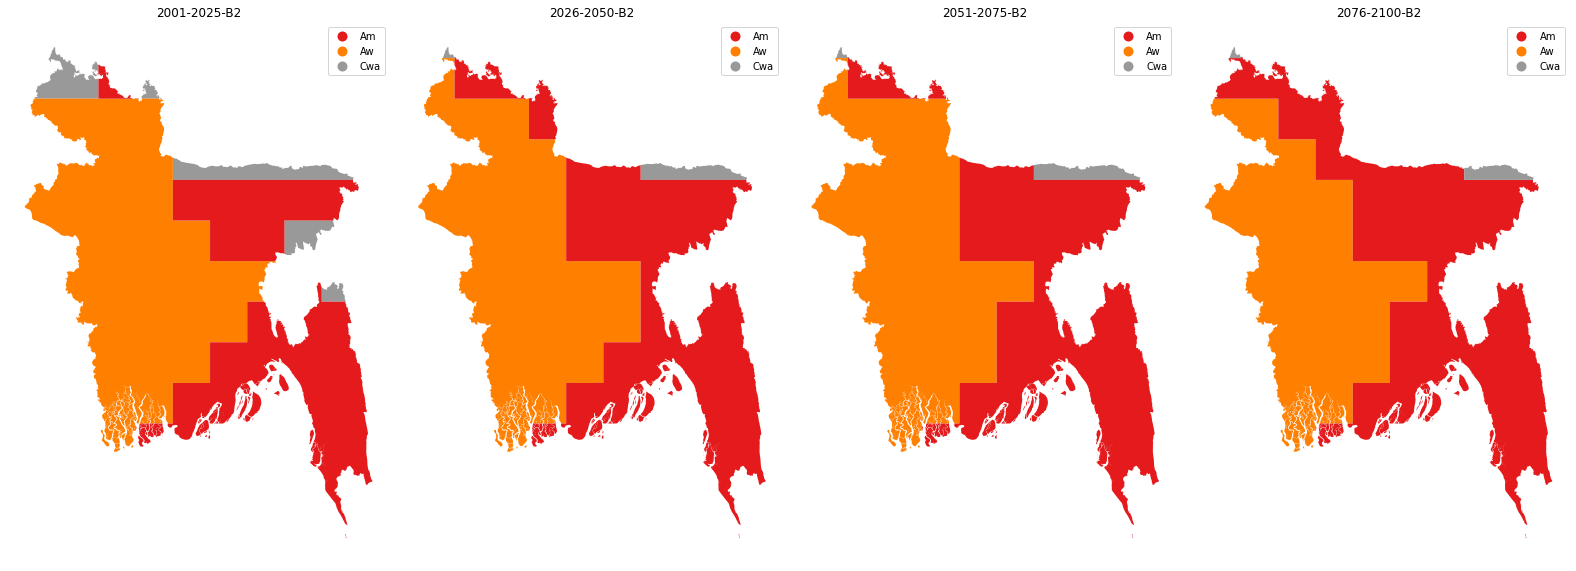

In [212]:
display(Markdown('<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [A1FI]</h1>'))

fig, axs = plt.subplots(1, 4, figsize=(22, 12))
replace = {
        11: 'Af', 12 :'Am', 13 : 'As', 14 : 'Aw', 21 : 'BWk', 22 : 'BWh', 26 : 'BSk', 27 : 'BSh',
        31 : 'Cfa', 32 : 'Cfb', 33 : 'Cfc', 34 : 'Csa', 35 : 'Csb', 36 : 'Csc', 37 : 'Cwa', 38 : 'Cwb', 
        39 : 'Cwc', 41 : 'Dfa', 42 : 'Dfb', 43 : 'Dfc', 44 : 'Dfd', 45 : 'Dsa', 46 : 'Dsb', 47 :'Dsc', 
        48 :'Dsd', 49 : 'Dwa', 50 : 'Dwb', 51 : 'Dwc', 52 : 'Dwd', 61 : 'EF', 62 :'ET',
    }

for i, year in r(["2001-2025-A1fi", "2026-2050-A1fi", "2051-2075-A1fi", "2076-2100-A1fi"]):
    filename = f"KoppenGeigerClimateShifts/{year}.geojson"
    koppen_shift = gpd.read_file(filename)
    koppen_shift['KOPPEN'] = koppen_shift['koppen'].map(replace)
    climate_shift_bd = gpd.clip(koppen_shift, bangladesh)
    climate_shift_bd.plot(ax=axs[i], column='gridcode', legend=True, cmap='Set1')
    axs[i].set_title(year, fontsize=12)
    axs[i].set_axis_off()
plt.tight_layout()
plt.show()


display(Markdown('<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [A2]</h1>'))
fig, axs = plt.subplots(1, 4, figsize=(22, 12))
replace = {
        11: 'Af', 12 :'Am', 13 : 'As', 14 : 'Aw', 21 : 'BWk', 22 : 'BWh', 26 : 'BSk', 27 : 'BSh',
        31 : 'Cfa', 32 : 'Cfb', 33 : 'Cfc', 34 : 'Csa', 35 : 'Csb', 36 : 'Csc', 37 : 'Cwa', 38 : 'Cwb', 
        39 : 'Cwc', 41 : 'Dfa', 42 : 'Dfb', 43 : 'Dfc', 44 : 'Dfd', 45 : 'Dsa', 46 : 'Dsb', 47 :'Dsc', 
        48 :'Dsd', 49 : 'Dwa', 50 : 'Dwb', 51 : 'Dwc', 52 : 'Dwd', 61 : 'EF', 62 :'ET',
    }

for i, year in enumerate(["2001-2025-A2", "2026-2050-A2", "2051-2075-A2", "2076-2100-A2"]):
    filename = f"KoppenGeigerClimateShifts/{year}.geojson"
    koppen_shift = gpd.read_file(filename)
    koppen_shift['KOPPEN'] = koppen_shift['koppen'].map(replace)
    climate_shift_bd = gpd.clip(koppen_shift, bangladesh)
    climate_shift_bd.plot(ax=axs[i], column='gridcode', legend=True, cmap='Set1')
    axs[i].set_title(year, fontsize=12)
    axs[i].set_axis_off()
plt.tight_layout()
plt.show()


display(Markdown('<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [B1]</h1>'))
fig, axs = plt.subplots(1, 4, figsize=(22, 12))
replace = {
        11: 'Af', 12 :'Am', 13 : 'As', 14 : 'Aw', 21 : 'BWk', 22 : 'BWh', 26 : 'BSk', 27 : 'BSh',
        31 : 'Cfa', 32 : 'Cfb', 33 : 'Cfc', 34 : 'Csa', 35 : 'Csb', 36 : 'Csc', 37 : 'Cwa', 38 : 'Cwb', 
        39 : 'Cwc', 41 : 'Dfa', 42 : 'Dfb', 43 : 'Dfc', 44 : 'Dfd', 45 : 'Dsa', 46 : 'Dsb', 47 :'Dsc', 
        48 :'Dsd', 49 : 'Dwa', 50 : 'Dwb', 51 : 'Dwc', 52 : 'Dwd', 61 : 'EF', 62 :'ET',
    }

for i, year in enumerate(["2001-2025-B1", "2026-2050-B1", "2051-2075-B1", "2076-2100-B1"]):
    filename = f"KoppenGeigerClimateShifts/{year}.geojson"
    koppen_shift = gpd.read_file(filename)
    koppen_shift['KOPPEN'] = koppen_shift['koppen'].map(replace)
    climate_shift_bd = gpd.clip(koppen_shift, bangladesh)
    climate_shift_bd.plot(ax=axs[i], column='gridcode', legend=True, cmap='Set1')
    axs[i].set_title(year, fontsize=12)
    axs[i].set_axis_off()
plt.tight_layout()
plt.show()


display(Markdown('<h1 style="text-align:center; font-weight:bold;">Climate Shift 2001-2100 [B2]</h1>'))
fig, axs = plt.subplots(1, 4, figsize=(22, 12))
replace = {
        11: 'Af', 12 :'Am', 13 : 'As', 14 : 'Aw', 21 : 'BWk', 22 : 'BWh', 26 : 'BSk', 27 : 'BSh',
        31 : 'Cfa', 32 : 'Cfb', 33 : 'Cfc', 34 : 'Csa', 35 : 'Csb', 36 : 'Csc', 37 : 'Cwa', 38 : 'Cwb', 
        39 : 'Cwc', 41 : 'Dfa', 42 : 'Dfb', 43 : 'Dfc', 44 : 'Dfd', 45 : 'Dsa', 46 : 'Dsb', 47 :'Dsc', 
        48 :'Dsd', 49 : 'Dwa', 50 : 'Dwb', 51 : 'Dwc', 52 : 'Dwd', 61 : 'EF', 62 :'ET',
    }

for i, year in enumerate(["2001-2025-B2", "2026-2050-B2", "2051-2075-B2", "2076-2100-B2"]):
    filename = f"KoppenGeigerClimateShifts/{year}.geojson"
    koppen_shift = gpd.read_file(filename)
    koppen_shift['KOPPEN'] = koppen_shift['koppen'].map(replace)
    climate_shift_bd = gpd.clip(koppen_shift, bangladesh)
    climate_shift_bd.plot(ax=axs[i], column='gridcode', legend=True, cmap='Set1')
    axs[i].set_title(year, fontsize=12)
    axs[i].set_axis_off()
plt.tight_layout()
plt.show()

### #7.2 Annual Mean Temperature

In [50]:
#reading the downloaded tif file (mentioned in references)
avg_temp_tif = r'wc2.1_5m_bio_1.tif'
temp_tif = rst.open(avg_temp_tif)

In [51]:
# clipping nz from tif
bangladesh_temp, bangladesh_transform = mask(temp_tif, [geom for geo in bangladesh.geometry], crop=True, pad=True)
bangladesh_meta = temp_tif.meta, tif.meta

# saving the clipped raster
bangladesh_meta.update({"driver": "MRLTiff",
                 "height": bangladesh_temp.shape[1],
                 "width": bangladesh_temp.shape[2],
                 "transform": bangladesh_transform})

with rst.open(r'temp_clipped.tiff', 'w', **bangladesh_meta) as dest:
    dest.write(bangladesh_temp)

In [52]:
# reading the clipped and saved nz raster
bangladesh_temp_tif = r'temp_clipped.tiff'
bangladesh_temp_img = rst.open(bangladesh_temp_tif)
arr = bangladesh_temp_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

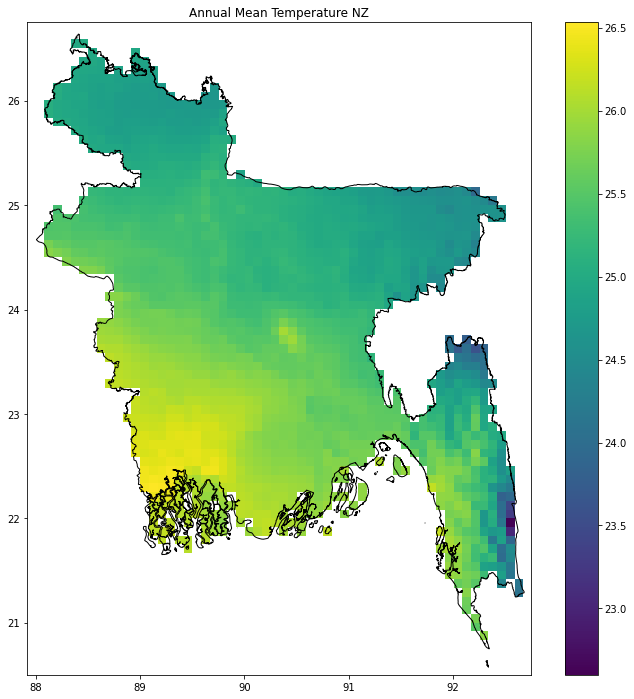

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
bangladesh.plot(ax=ax, color='none', legend=True)
show(arr, transform=bangladesh_temp_img.transform, ax=ax)
ax.set_title("Annual Mean Temperature NZ")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

### #7.3 Annual Mean Precipitation

In [54]:
#reading the downloaded tif file (mentioned in references)
avg_ppt_tif = r'wc2.1_5m_bio_12.tif'
ppt_tif = rst.open(avg_ppt_tif)

In [55]:
# clipping nz from tif
bangladesh_ppt, bangladesh_transform = mask(ppt_tif, [geom for geo in bangladesh.geometry], crop=True, pad=True)
bangladesh_meta = ppt_tif.meta, tif.meta

# saving the clipped raster
bangladesh_meta.update({"driver": "MRLTiff",
                 "height": bangladesh_ppt.shape[1],
                 "width": bangladesh_ppt.shape[2],
                 "transform": bangladesh_transform})

with rst.open(r'ppt_clipped.tiff', 'w', **bangladesh_meta) as dest:
    dest.write(bangladesh_ppt)

In [56]:
# reading the clipped and saved nz raster
bangladesh_ppt_tif = r'ppt_clipped.tiff'
bangladesh_ppt_img = rst.open(bangladesh_ppt_tif)
arr = bangladesh_ppt_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

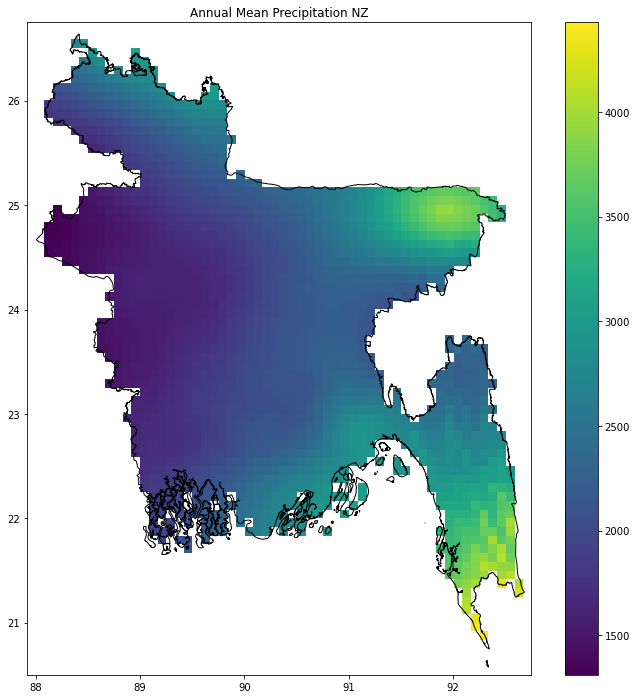

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
bangladesh.plot(ax=ax, color='none', legend=True)
show(arr, transform=bangladesh_ppt_img.transform, ax=ax)
ax.set_title("Annual Mean Precipitation NZ")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

## #8: Water Scarcity

In [94]:
#reading the downloaded tif file (mentioned in references)
ws_tif = r'WaterScarcity_GAEZ.tif'
ws_tif = rst.open(ws_tif)

In [95]:
# clipping nz from tif
bangladesh_ws, bangladesh_transform = mask(ws_tif, [geom for geo in bangladesh.geometry], crop=True, pad=True)
bangladesh_meta = ws_tif.meta, tif.meta

# saving the clipped raster
bangladesh_meta.update({"driver": "MRLTiff",
                 "height": bangladesh_ws.shape[1],
                 "width": bangladesh_ws.shape[2],
                 "transform": bangladesh_transform})

with rst.open(r'wsclipped.tiff', 'w', **bangladesh_meta) as dest:
    dest.write(bangladesh_ws)

In [96]:
# reading the clipped and saved nz raster
bangladesh_ws_tif = r'wsclipped.tiff'
bangladesh_ws_img = rst.open(bangladesh_ws_tif)
arr = bangladesh_ws_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

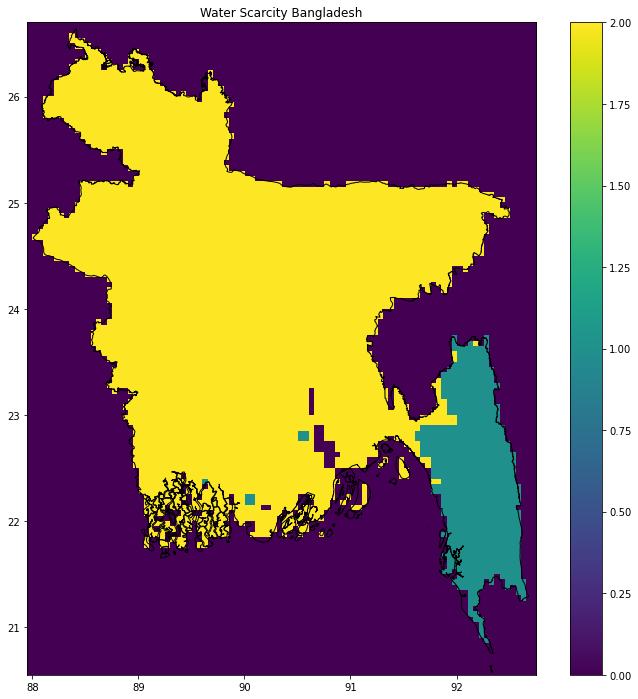

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
bangladesh.plot(ax=ax, color='none', legend=True)
show(arr, transform=bangladesh_ws_img.transform, ax=ax)
ax.set_title("Water Scarcity Bangladesh")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

### Observation: 
- The Water Scarcity seems to be way lower in southeastern coast receiving higher annual precipitation (Tropical Wet Climate).

## #9: Soil Nutrients Availability

In [98]:
#reading the downloaded tif file (mentioned in references)
soiln_tif = r'SoilResources_NutrientAvailability_GAEZ.tif'
soiln_tif = rst.open(soiln_tif)

In [99]:
# clipping nz from tif
bangladesh_soiln, bangladesh_transform = mask(soiln_tif, [geom for geo in bangladesh.geometry], crop=True, pad=True)
bangladesh_meta = soiln_tif.meta, tif.meta

# saving the clipped raster
bangladesh_meta.update({"driver": "MRLTiff",
                 "height": bangladesh_soiln.shape[1],
                 "width": bangladesh_soiln.shape[2],
                 "transform": bangladesh_transform})

with rst.open(r'soilnclipped.tiff', 'w', **bangladesh_meta) as dest:
    dest.write(bangladesh_soiln)

In [100]:
# reading the clipped and saved nz raster
bangladesh_soiln_tif = r'soilnclipped.tiff'
bangladesh_soiln_img = rst.open(bangladesh_soiln_tif)
arr = bangladesh_soiln_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

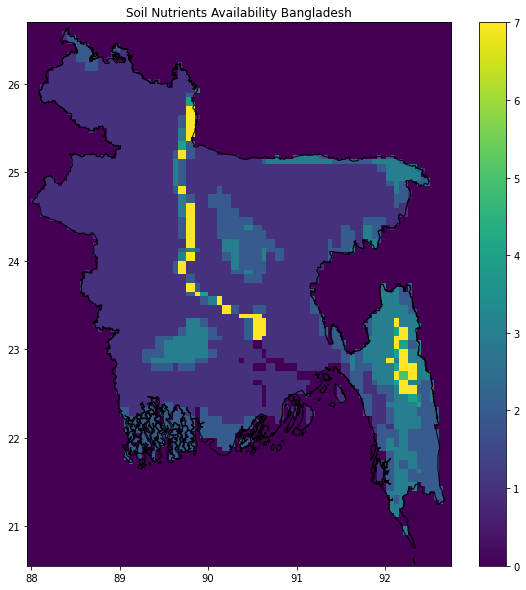

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
bangladesh.plot(ax=ax, color='none', legend=True)
show(arr, transform=bangladesh_soiln_img.transform, ax=ax)
ax.set_title("Soil Nutrients Availability Bangladesh")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

### Observation: 

- Here, a clear strip could be spotted originating from the Northern region and traveling all the way down to the Southern region, they are the waterbodies enriching the soil nurtients around them whereas the soil nutrient availability in the entire country is relaively very low as compared to the forementioned areas.

- The areas on the Eastern Coast receiving high annual rainfall have got higher soil nutrients.

#### References, Sources & Datasets:
- Datasets: https://datasets.mojaglobal.workers.dev/0:/
- Climate Dataset (tif) (WorldClim Historical Climate Data): https://www.worldclim.org/data/worldclim21.html
- https://www.ipcc.ch/data/
- https://data.apps.fao.org/map/catalog/srv/eng/catalog.search#/home